In [1]:
#Gini = 1-(x/n)2 - (y/n)2
#x=positive answer | y=negetive answer | n= number of sample
#if gini is 0 => we get to leaf

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('data.csv')
data=data.drop(['Location','img'],1)
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725
...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802
996,30.274,56.951,1748.3,2.498567,5,90,258.581072
997,30.274,56.951,1748.3,2.498567,15,90,258.087367
998,30.274,56.951,1748.3,2.498567,25,90,254.746498


In [4]:
data.describe()

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.004700,51.072400,1092.760000,3.508085,0.000000,45.000000,337.362954
std,3.851903,3.390699,740.292278,1.613040,28.737185,28.737185,60.023406
min,27.218000,46.235000,-12.200000,1.796619,-45.000000,0.000000,164.014553
25%,29.539000,48.417000,20.700000,2.335595,-25.000000,20.000000,293.097438
50%,32.524000,50.838500,1368.700000,3.050507,0.000000,45.000000,343.597690
75%,37.325000,52.589000,1545.900000,4.151495,25.000000,70.000000,385.784373
max,38.317000,56.951000,2049.200000,6.859957,45.000000,90.000000,446.683693


In [5]:
conditions=[
    (data['ACenergyPerYear']<=164),
    (data['ACenergyPerYear']>164) & (data['ACenergyPerYear']<=293),
    (data['ACenergyPerYear']>293) & (data['ACenergyPerYear']<=343),
    (data['ACenergyPerYear']>343) & (data['ACenergyPerYear']<=385),
    (data['ACenergyPerYear']>385)
]
# 0 to 4 -> worse to best
values=[0,1,2,3,4]

In [6]:
data['Situation']=np.select (conditions,values)

In [7]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,Situation
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217,1
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595,1
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211,2
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573,2
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725,2
...,...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802,1
996,30.274,56.951,1748.3,2.498567,5,90,258.581072,1
997,30.274,56.951,1748.3,2.498567,15,90,258.087367,1
998,30.274,56.951,1748.3,2.498567,25,90,254.746498,1


In [8]:
features=np.array(data.drop(['ACenergyPerYear','Situation'],1))
target=np.array(data['Situation'])

In [23]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [42]:
testsizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
testsizedf=[]
scorelist=[]
bestacc=0
besttestsize=0
for i in range(1000):
    for i in range(len(testsizes)):
        X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=testsizes[i])
        testsizedf.append(testsizes[i])
        model.fit(X_train,y_train)
        acc=model.score(X_test,y_test)
        scorelist.append(acc)
        if acc>bestacc:
            bestacc=acc
            besttestsize=testsizes[i]

In [43]:
bestacc

0.98

In [44]:
besttestsize

0.1

In [60]:
dftest=pd.DataFrame()
dftest['testsize']=testsizedf
dftest['accuracy']=scorelist

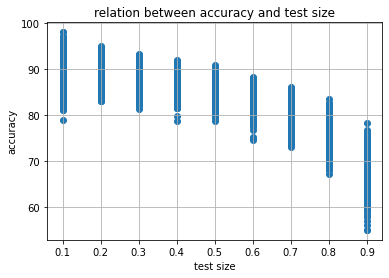

In [55]:
plt.grid()
plt.xlabel('test size')
plt.ylabel('accuracy')
plt.title('relation between accuracy and test size')
plt.scatter(dftest['testsize'],dftest['accuracy']*100)
plt.savefig('relationaccuracytestsize.png',dpi=300)

# Visualization

In [56]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg

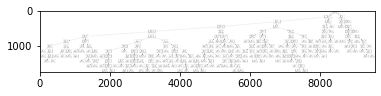

<Figure size 2160x360 with 0 Axes>

In [59]:
Feature_names=['Latitude','Longitude','Elevation','Skycover','Orientation','Tilt']
data = tree.export_graphviz(model,out_file=None,feature_names=Feature_names)
graph=pydotplus.graph_from_dot_data(data)
#graph.write_png('mydesiciontree.png')
img=pltimg.imread('mydesiciontree.png')
imgplot=plt.imshow(img)
plt.figure(figsize=(30,5))
plt.savefig('mydesiciontree1.jpg',dpi=2000)
plt.show()